In [15]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [16]:
# Load 2 data sets
app_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\application_record.csv')

cre_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record.csv')

In [17]:
# Check the size of each data set
print(app_rec.shape)
print(cre_rec.shape)

(438557, 18)
(1048575, 3)


# Data Exploration

In [18]:
# To Evaluate Columns' Name:
app_rec.columns.to_list()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

In [19]:
# Print first few raws of data and check them visually:
app_rec.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [20]:
# To Evaluate Data Type and Size:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

['M' 'F']
['Y' 'N']
['Y' 'N']
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


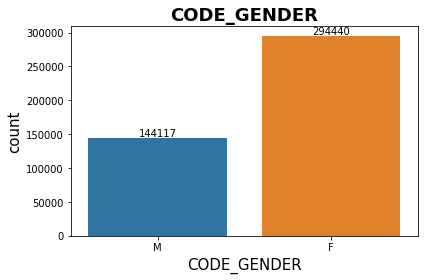

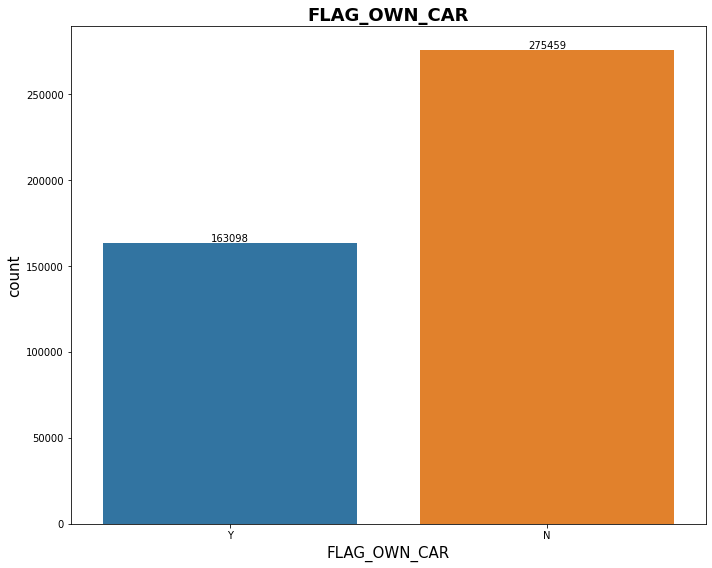

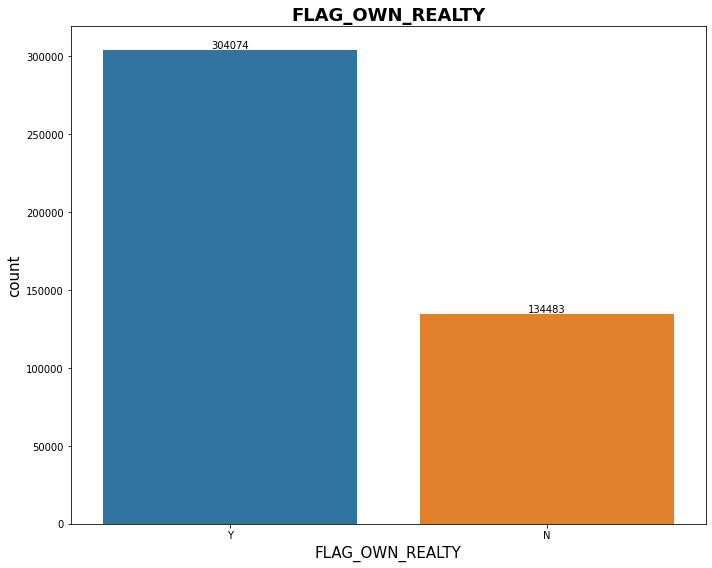

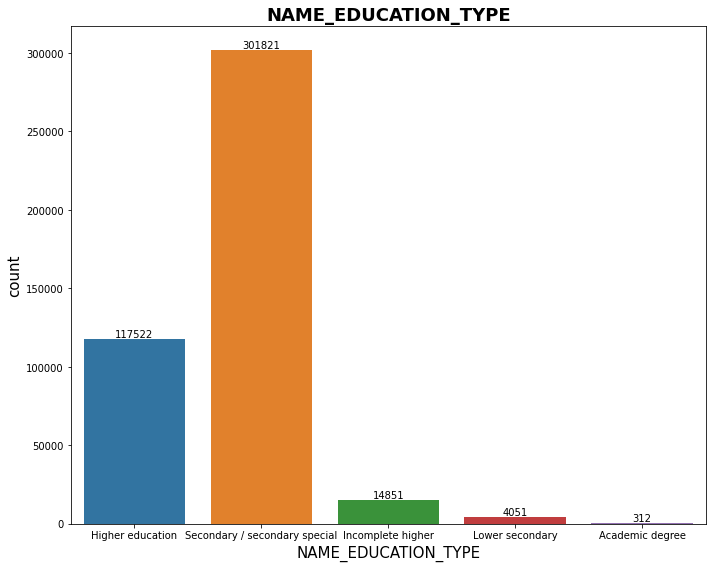

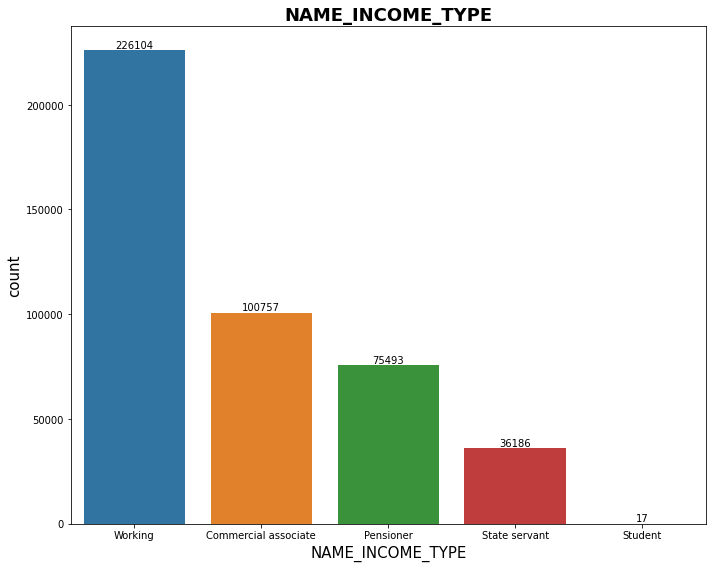

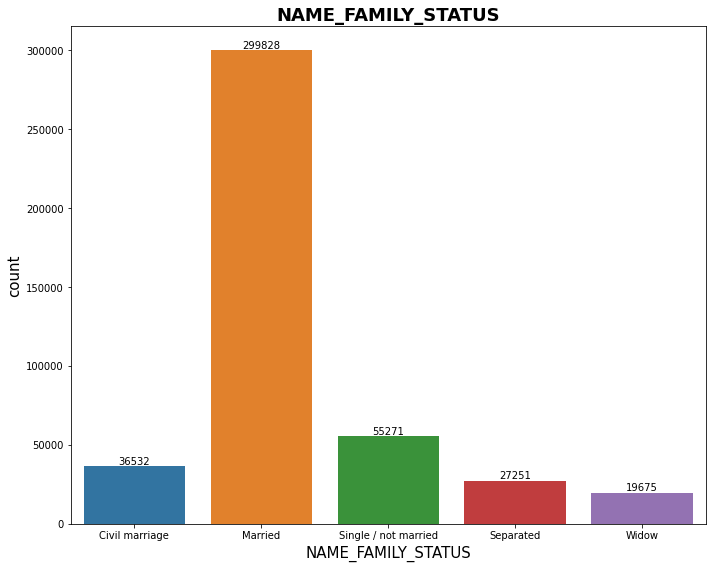

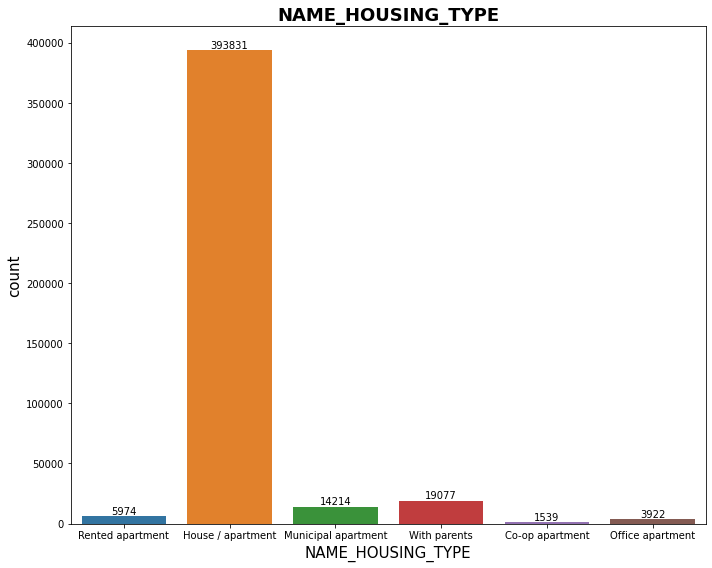

In [21]:
print(app_rec.CODE_GENDER.unique())
print(app_rec.FLAG_OWN_CAR.unique())
print(app_rec.FLAG_OWN_REALTY.unique())
print(app_rec.NAME_INCOME_TYPE.unique())
print(app_rec.NAME_EDUCATION_TYPE.unique())
print(app_rec.NAME_FAMILY_STATUS.unique())
print(app_rec.NAME_HOUSING_TYPE.unique())

# Create a for loop for visualization of frequency of items in each aforementioned columns
for var in ["CODE_GENDER","FLAG_OWN_CAR",	"FLAG_OWN_REALTY", 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',   'NAME_FAMILY_STATUS',  'NAME_HOUSING_TYPE']:
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x =var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [ ]:
#Check the Numeric fields
app_rec.describe().T

In [ ]:
for var in ['CNT_CHILDREN']:  # It doenot have so much variables range!
    countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

# My Graphs does not work correctly. Question from Saee: WHat I should do for th barplot?

In [ ]:
for var in ['AMT_INCOME_TOTAL',  'DAYS_EMPLOYED']:   # These 2 columns have a whide range of numerical values!
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [18, 5]
    plt.rcParams["figure.autolayout"] = True
    ax.set(yscale="log")
    ax =  sns.boxplot(app_rec[var])
    # ax.set(yscale="log")
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    # ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [ ]:
#Check Dublicate rows
app_rec.duplicated().sum()

We do not have any dublicated rows. However, we have dublicated IDs:

In [ ]:
app_rec.ID.duplicated().sum()

In [ ]:
# filter the data to find and evaluate rows with duplicated rows:
app_rec_dup_ID = app_rec[app_rec['ID'].duplicated(keep=False) == True].sort_values(by=['ID']).reset_index(drop=True)
app_rec_dup_ID

Due to the sensitivity of the dublication in ID, as a key, I decided to drop all rows with dublicated IDs.(please see the Cleaning part)

In [ ]:
#check Missing Values
app_rec.isnull().sum()

In [ ]:
# Check the OCCUPATION_Type:

# print("Number of Missing Values:", app_rec.OCCUPATION_TYPE.isnull().sum())
# app_rec.OCCUPATION_TYPE.value_counts()

app_rec.OCCUPATION_TYPE.value_counts(dropna = False)  # The same as above but much more efficient!


# Data Cleaning

In [ ]:
# Change the data type of the 'ID' to string data type:
columns = ['ID']#,'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
for column in columns:
    app_rec[column] = app_rec[column].astype(str)
    
print(app_rec["ID"].dtypes)

In [ ]:
# We can assign "Other" for null values. 
app_rec["OCCUPATION_TYPE"].fillna("Other", inplace = True)

In [ ]:
#Remove the duplicates values for IDs:
app_rec = app_rec.drop_duplicates(subset=['ID']).reset_index(drop=True)

In [ ]:
# Replace any positive value of DAYS_EMPLOYED with 0:
app_rec['DAYS_EMPLOYED'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

# Feature Engineering

In [ ]:
# Create month_employed from DAYS_EMPLOYED.
app_rec["MONTH_EMPLOYED"] = (app_rec["DAYS_EMPLOYED"]/30).abs() 
app_rec["MONTH_EMPLOYED"]  = app_rec["MONTH_EMPLOYED"].apply(np.ceil)
app_rec[["MONTH_EMPLOYED","DAYS_EMPLOYED"] ]

In [ ]:
# we have outliers in AMT_INCOME_TOTAL. We have 2 choices, either remove the outliers or creat buckets for values based on the 8 percentile groups. 
# The second option was selected. Since we have mathematical relationship between buckets, we do not need to use onehot encoding technique for "AMT_INCOME_TOTAL_BUKET"

# Create Buckets based on 8 percentail groups:
app_rec['AMT_INCOME_TOTAL_BUKET'], cut_bin = pd.qcut(app_rec['AMT_INCOME_TOTAL'], q = 8, labels = ['1','2','3','4','5','6','7','8'], retbins = True)

# Visualize the groups of incomes:
for var in ['AMT_INCOME_TOTAL_BUKET']: 
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    sns.set_style("darkgrid")
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [ ]:
## Create an employement flag fom DAYS_EMPLOYED.
# app_rec['FLAG_EMPLOYED2'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0).astype(str)

## New: Bolean based on a condition instrad of code incell ablove.
app_rec["FLAG_EMPLOYED"] = app_rec['DAYS_EMPLOYED'] < 0 
app_rec.head(10)

In [ ]:
# Create Age based on DAYS_BIRTH.
app_rec['AGE'] = (app_rec['DAYS_BIRTH']/365).abs().apply(np.floor)
app_rec.hist(column='AGE');

In [ ]:
# Use OneHot_encoding to create binary values for 4 different fiels (see the above cell):  
# SAeed's Comment: We can convert Education Type to numeric because it has mathematical meaning, but Family Status and other should be changed to OneHot Encoding! In this example I kept it in Get Dummy!
app_rec = pd.get_dummies(data=app_rec, columns=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","OCCUPATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"])#.astype(str)

In [ ]:
app_rec = app_rec.drop(['AMT_INCOME_TOTAL',"DAYS_EMPLOYED",'DAYS_BIRTH'],axis = 1)

In [ ]:
app_rec.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\app_rec_processed.csv', index=False)

# B - cre_rec Data Cleaning & Transforming

In [ ]:
cre_rec['COUNT'] = cre_rec.groupby('ID')['ID'].transform('count')

In [ ]:
cre_rec = cre_rec.loc[cre_rec['COUNT']>12,:].reset_index(drop=True)

In [ ]:
cre_rec.ID.nunique()

In [ ]:
cre_rec.shape

In [ ]:
print("Name of the columns:" ,cre_rec.columns)
print(cre_rec.shape)

In [ ]:
ax =  sns.countplot(x='STATUS', data = cre_rec)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

In [ ]:
cre_rec['BINARY_STATUS'] = cre_rec['STATUS'].replace(['X','0','C'],0)
cre_rec['BINARY_STATUS'] = cre_rec['BINARY_STATUS'].replace(['1','2','3','4','5'],1)

In [ ]:
ax =  sns.countplot(x='BINARY_STATUS', data = cre_rec)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

In [ ]:
cre_rec.info()

In [ ]:
cre_rec.sort_values(by=['ID',"MONTHS_BALANCE"], ascending=False)

In [ ]:
%%time
def my_core_Function(CID, TID,Tlag):
    try:
        Lag_Label = list(cre_rec.loc[(cre_rec["ID"] == CID) & (cre_rec["MONTHS_BALANCE"] == (TID+Tlag)), "BINARY_STATUS"])[0]
    except:
        Lag_Label = np.nan
    return Lag_Label

In [ ]:
# Create a lable column by applying the function into the dataframe.
# progress_apply is the same as apply, but it shows the progressbar which is very helpful to monitor the progress, specially for large dataframes.

cre_rec.loc[:,"LABEL"] = cre_rec.progress_apply(lambda x: my_core_Function(x["ID"], x["MONTHS_BALANCE"],3), axis=1)


In [ ]:
cre_rec.head(5)

In [ ]:
cre_rec.drop(columns = ["COUNT"],axis = 1)

In [ ]:
# Drop rows with NaN value for Labels:
cre_rec= cre_rec.dropna(subset=['LABEL']).reset_index(drop=True)

# Change the ID to Object data tyoe
cre_rec["ID"] = cre_rec["ID"].astype(str)
cre_rec

In [ ]:
# Saved the processed data.
cre_rec.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record_processed.csv', index=False)

# C - Merge the Data Sets

In [4]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [5]:
# Read the saved data
app_rec_prcd = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\app_rec_processed.csv')
cre_rec_prcd = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record_processed.csv')

In [6]:
print(app_rec_prcd.shape)
print(cre_rec_prcd.shape)

(438510, 57)
(850307, 6)


In [7]:
app_rec_prcd

,ID,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTH_EMPLOYED,AMT_INCOME_TOTAL_BUKET,FLAG_EMPLOYED,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,0,0,0,0,0,1,0
1,5008805,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,0,0,0,0,0,1,0
2,5008806,0,1,0,0,0,2.0,38.0,2,True,...,1,0,0,0,0,1,0,0,0,0
3,5008808,0,1,0,1,1,1.0,102.0,7,True,...,0,0,1,0,0,1,0,0,0,0
4,5008809,0,1,0,1,1,1.0,102.0,7,True,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,0,1,0,0,0,1.0,0.0,3,False,...,0,1,0,0,0,1,0,0,0,0
438506,6840222,0,1,0,0,0,1.0,101.0,2,True,...,0,0,1,0,0,1,0,0,0,0
438507,6841878,0,1,1,0,0,1.0,13.0,1,True,...,0,0,1,0,0,0,0,0,0,1
438508,6842765,0,1,0,0,0,2.0,0.0,1,False,...,1,0,0,0,0,1,0,0,0,0


In [8]:
# Merge 2 datasets based on the id
data = pd.merge(app_rec_prcd,cre_rec_prcd,on='ID',how='inner').reset_index(drop=True)

In [9]:
data

,ID,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTH_EMPLOYED,AMT_INCOME_TOTAL_BUKET,FLAG_EMPLOYED,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,MONTHS_BALANCE,STATUS,COUNT,BINARY_STATUS,LABEL
0,5008804,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,1,0,-3,C,16,0,0.0
1,5008804,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,1,0,-4,C,16,0,0.0
2,5008804,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,1,0,-5,C,16,0,0.0
3,5008804,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,1,0,-6,C,16,0,0.0
4,5008804,0,1,1,0,0,2.0,152.0,8,True,...,0,0,0,1,0,-7,C,16,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617192,5150337,0,1,0,0,0,1.0,40.0,2,True,...,0,0,0,1,0,-9,0,14,0,0.0
617193,5150337,0,1,0,0,0,1.0,40.0,2,True,...,0,0,0,1,0,-10,2,14,1,0.0
617194,5150337,0,1,0,0,0,1.0,40.0,2,True,...,0,0,0,1,0,-11,1,14,1,0.0
617195,5150337,0,1,0,0,0,1.0,40.0,2,True,...,0,0,0,1,0,-12,0,14,0,0.0


In [10]:
data = data.set_index(["ID", "MONTHS_BALANCE"])

In [11]:
data

CNT_CHILDREN  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
ID      MONTHS_BALANCE                                                          
5008804 -3                         0           1                1           0   
        -4                         0           1                1           0   
        -5                         0           1                1           0   
        -6                         0           1                1           0   
        -7                         0           1                1           0   
...                              ...         ...              ...         ...   
5150337 -9                         0           1                0           0   
        -10                        0           1                0           0   
        -11                        0           1                0           0   
        -12                        0           1                0           0   
        -13                        0           1                0           0   

                        FLAG_EMAIL  CNT_FAM_MEMBERS  MONTH_EMPLOYED  \
ID      MONTHS_BALANCE                                                
5008804 -3                       0              2.0           152.0   
        -4                       0              2.0           152.0   
        -5                       0              2.0           152.0   
        -6                       0              2.0           152.0   
        -7                       0              2.0           152.0   
...                            ...              ...             ...   
5150337 -9                       0              1.0            40.0   
        -10                      0              1.0            40.0   
        -11                      0              1.0            40.0   
        -12                      0              1.0            40.0   
        -13                      0              1.0            40.0   

                        AMT_INCOME_TOTAL_BUKET  FLAG_EMPLOYED   AGE  ...  \
ID      MONTHS_BALANCE                                               ...   
5008804 -3                                   8           True  32.0  ...   
        -4                                   8           True  32.0  ...   
        -5                                   8           True  32.0  ...   
        -6                                   8           True  32.0  ...   
        -7                                   8           True  32.0  ...   
...                                        ...            ...   ...  ...   
5150337 -9                                   2           True  25.0  ...   
        -10                                  2           True  25.0  ...   
        -11                                  2           True  25.0  ...   
        -12                                  2           True  25.0  ...   
        -13                                  2           True  25.0  ...   

                        NAME_HOUSING_TYPE_Co-op apartment  \
ID      MONTHS_BALANCE                                      
5008804 -3                                              0   
        -4                                              0   
        -5                                              0   
        -6                                              0   
        -7                                              0   
...                                                   ...   
5150337 -9                                              0   
        -10                                             0   
        -11                                             0   
        -12                                             0   
        -13                                             0   

                        NAME_HOUSING_TYPE_House / apartment  \
ID      MONTHS_BALANCE                                        
5008804 -3                                                0   
        -4                                                0   
        -5 

In [12]:
#Save the Cleaned Data
data.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

# D - Model Development

In [13]:
# Reload the Cleaned Data
data = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

In [14]:
data.columns

Index(['ID', 'MONTHS_BALANCE', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTH_EMPLOYED',
       'AMT_INCOME_TOTAL_BUKET', 'FLAG_EMPLOYED', 'AGE', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'OCCUPATION_TYPE_Accountants',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Managers',
       'OCCUPATION_TYPE_Medicine staff', 'OCCUPATION_TYPE_Other',
       'OCCUPATION_TYPE_Private service staff',
       'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Sales staff',
       'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Security staff',
       'OCCUPATION_TYPE_Wai

In [22]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['LABEL'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop(['STATUS', 'COUNT', 'BINARY_STATUS','LABEL'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [23]:
feature_list

['ID',
 'MONTHS_BALANCE',
 'CNT_CHILDREN',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'MONTH_EMPLOYED',
 'AMT_INCOME_TOTAL_BUKET',
 'FLAG_EMPLOYED',
 'AGE',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_TYPE_Cleaning staff',
 'OCCUPATION_TYPE_Cooking staff',
 'OCCUPATION_TYPE_Core staff',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_HR staff',
 'OCCUPATION_TYPE_High skill tech staff',
 'OCCUPATION_TYPE_IT staff',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'OCCUPATION_TYPE_Managers',
 'OCCUPATION_TYPE_Medicine staff',
 'OCCUPATION_TYPE_Other',
 'OCCUPATION_TYPE_Private service staff',
 'OCCUPATION_TYPE_Realty agents',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Secretaries',
 'OCCUPATION_TYPE_Security staff',
 'OCCUPATION_TYPE_Waiters/barmen staff',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
#Load Required librarys
import sklearn 

In [ ]:
#train model 1

In [ ]:
#Test model 1

In [ ]:
#evaluate model 1

In [ ]:
pwd

Misc

In [ ]:
# sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10, 10)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.boxplot( y=app_rec["AMT_INCOME_TOTAL"] )
ax.set(xlabel='Income', ylabel='Dollar Value')



In [ ]:
# No need to create Bucket. It is better to keep it as numeric.
# Create 8 different bucket of Ages
# bins = [0, 20, 25,30,45,55,60, 65, 70]
# labels = [1,2,3,4,5,6,7,8]
# app_rec['AGE_BUKET'] = pd.cut(app_rec['AGE'], bins,labels=labels)
# app_rec['AGE_BUKET']

In [ ]:
# Create Count of Children bucket based on CNT_CHILDREN
# app_rec.CNT_CHILDREN.value_counts()

In [ ]:
# It Seems we have imbalanced data. What will be the next step to address this situation and avoid consequential issues? Question from Saeed: What should I do in this situation?
# Note from Saeed: the imbalance is a problem for label, not for features!

In [ ]:
# # should be changed to number
# app_rec.CNT_CHILDREN_BUCKET = app_rec.CNT_CHILDREN
# def conditions(i): 
#     if i ==0 : return '0'
#     if i ==1 : return "1"
#     if i ==2 : return '2'
#     if i ==3 : return '3'
#     if i ==4 : return '4'
#     if i >= 5: return '5'

# app_rec['CNT_CHILDREN_BUCKET']=app_rec['CNT_CHILDREN'].apply(conditions)


In [ ]:
cre_rec.STATUS.unique()
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

In [ ]:
CID = "5001757"
TID = -7
WL = 4

D_LABEL_AT_WL = list(cre_rec.loc[(cre_rec['ID'] == CID) & (cre_rec['MONTHS_BALANCE'] == (TID + WL)), 'BINARY_STATUS'])[0]
D_LABEL_AT_WL

In [ ]:
CID = "5001757"
TID = -8
Tlag = 4

LABEL        = list(cre_rec.loc[(cre_rec["ID"] == CID) & (cre_rec["MONTHS_BALANCE"] == (TID+Tlag)), "BINARY_STATUS"])[0]
LABEL

In [ ]:
from zipfile import LargeZipFile


Questions:
for loop for 0-12 month LargeZipFile
lets change some of the variables

In [ ]:
%%time
mydf = pd.DataFrame({"ID":[],"COUNT":[]})
myIDs = cre_rec.ID.unique()
for i in myIDs:
    count = cre_rec.loc[cre_rec["ID"]==i, "ID"].count()
    new_row = pd.DataFrame({"ID":[i], "COUNT":[count]})
    mydf = mydf.append(new_row)


In [ ]:
# Home Work 2 - 
from telnetlib import STATUS
from typing import Counter


Average
Count - Age of the account
Mean 
Max


Current STATUS
Window Length (6 & 12 Months)
